In [1]:
import torchvision

In [2]:
import torch

In [3]:
from torchvision import datasets, transforms

In [4]:
train=datasets.MNIST("",train=True, download=True,transform=transforms.Compose([transforms.ToTensor()]))

In [5]:
test=datasets.MNIST("",train=False, download=True,transform=transforms.Compose([transforms.ToTensor()]))

In [6]:
trainset=torch.utils.data.DataLoader(train, batch_size=10,shuffle=True)

In [7]:
testset=torch.utils.data.DataLoader(test, batch_size=10,shuffle=True)

In [9]:
x,y=data[0][0],data[1][0]

In [10]:
import matplotlib.pyplot as plt

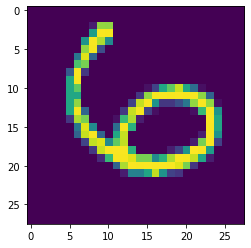

In [12]:
plt.imshow(data[0][0].view(28,28))
plt.show()

In [14]:
counter_dict={}
for data in trainset:
    Xs,ys = data
    for y in ys:
        if int(y) in counter_dict:
            counter_dict[int(y)]+=1
        else:
            counter_dict[int(y)]=1

In [15]:
counter_dict

{5: 5421,
 6: 5918,
 8: 5851,
 0: 5923,
 2: 5958,
 3: 6131,
 7: 6265,
 9: 5949,
 1: 6742,
 4: 5842}

In [16]:
trainset

In [18]:
import torch.nn as nn
import torch.nn.functional as F

In [48]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1=nn.Linear(784, 64)
        self.fc2=nn.Linear(64, 64)
        self.fc3=nn.Linear(64, 64)
        self.fc4=nn.Linear(64, 10)
    
    def forward(self, x):
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=F.relu(self.fc3(x))
        x=self.fc4(x)
        return F.log_softmax(x, dim=1)
       
        
#         return x

net = Net()
print(net)
        

                

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [40]:
import torch.optim as optim

In [52]:
optimizer = optim.Adam(net.parameters(), lr=0.001)

epochs =3 

for epoch in range(epochs):
    for data in trainset:
        # data is a batch of featuresets and labels
        X,y=data
        net.zero_grad()
        # if the data is a one hot vector use MSE, if data is a single value
        # use nll_loss
        output=net(X.view(-1,784))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss) 

tensor(0.0818, grad_fn=<NllLossBackward>)
tensor(0.1200, grad_fn=<NllLossBackward>)
tensor(0.0097, grad_fn=<NllLossBackward>)


In [53]:
correct = 0
total = 0 

with torch.no_grad():
    for data in trainset:
        X,y=data
        output = net(X.view(-1,784))
        for idx, i in enumerate(output):
            if torch.argmax(i)==y[idx]:
                correct+=1
            total+=1
print("Accuracy", round(correct/total,3))

Accuracy 0.965


In [60]:
torch.argmax(output[0])

tensor(5)

In [61]:
y[0]

tensor(5)

In [62]:
output[0]

tensor([-2.4076e+01, -1.6403e+01, -2.0178e+01, -1.2112e+01, -2.5945e+01,
        -5.6028e-06, -2.0469e+01, -2.4819e+01, -1.7768e+01, -1.8339e+01])

In [64]:
y

tensor([5, 7, 5, 6, 8, 1, 6, 8, 4, 2])

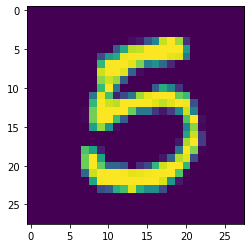

In [67]:
import matplotlib.pyplot as plt
plt.imshow(X[0].view(28,28))
plt.show()

In [68]:
print(torch.argmax(net(X[0].view(-1,784))[0]))

tensor(5)


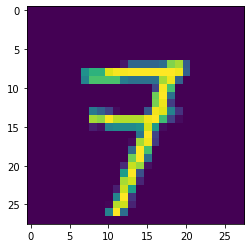

In [75]:
import matplotlib.pyplot as plt
plt.imshow(X[1].view(28,28))
plt.show()

In [76]:
print(torch.argmax(net(X[1].view(-1,784))))

tensor(7)


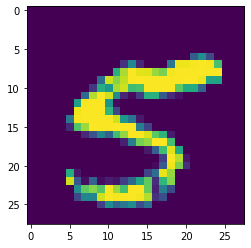

In [78]:
import matplotlib.pyplot as plt
plt.imshow(X[2].view(28,28))
plt.show()

In [77]:
print(torch.argmax(net(X[2].view(-1,784))))

tensor(5)
